## Build a predictive linear regression model for given dataset, given humidity predict apparent temperature


### Data Preprocessing 

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reading dataset file
data = pd.read_csv('weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [44]:
data = data.loc[:,['Humidity','Apparent Temperature (C)']]
data.isna().sum()              # checking column-wise any null value

Humidity                    0
Apparent Temperature (C)    0
dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 2 columns):
Humidity                    96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
dtypes: float64(2)
memory usage: 1.5 MB


#### Scaling Apparent Temperature from Celsius scale to Kelvin scale

In [47]:
data['Apparent Temperature (C)'] = data['Apparent Temperature (C)'] + 273.15

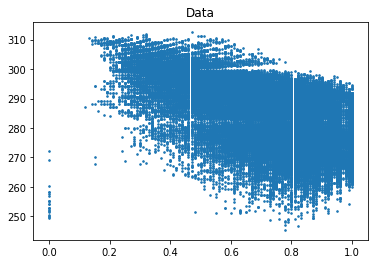

In [48]:
data.rename(columns= {"Apparent Temperature (C)": "Apparent Temperature (K)"}, inplace=True)
plt.scatter(data['Humidity'],data['Apparent Temperature (K)'], marker='.',s=10)
plt.title('Data')
plt.show()

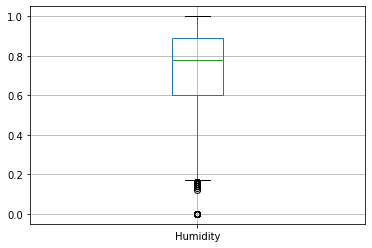

In [49]:
data.loc[:,['Humidity']].boxplot()           # checking for outliers in features 
plt.show()

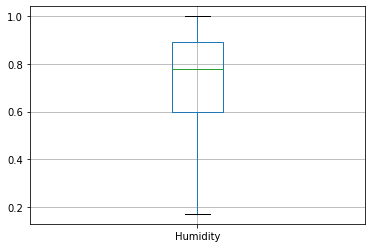

In [50]:
# removing outliers
quartile1 = data['Humidity'].quantile(0.25)
quartile3 = data['Humidity'].quantile(0.75)
IQR = quartile3 - quartile1                  # Inter-quartile range
# getting indices of outliers
outliers =data.loc[(data['Humidity'] < quartile1 - 1.5*IQR) | (data['Humidity'] > quartile3 + 1.5*IQR)].index
data = data.drop(outliers)
data.loc[:,['Humidity']].boxplot()          # 
plt.show()

### Splitting dataset into train set & test set

In [51]:
# Splitting 70 % dataset into train set & 30 % dataset into dataset into test set
train = data.sample(frac=0.7, random_state=3)   # selecting random 0.7 fraction of dataset as train set   
# chossing different random state will give different random rows
test = data.drop(train.index)            # selecting remaining i.e. 30% as test set
print('Train set')
print(train.shape)
train.head()

Train set
(67485, 2)


,Humidity,Apparent Temperature (K)
19981,0.28,274.694444
90872,0.69,266.572222
78804,0.72,294.361111
9401,0.40,286.072222
20015,0.85,270.255556


In [52]:
print('Test set')
print(test.shape)
test.head()

Test set
(28922, 2)


,Humidity,Apparent Temperature (K)
1,0.86,280.377778
2,0.89,282.527778
6,0.95,278.672222
7,0.89,279.677778
8,0.82,283.972222


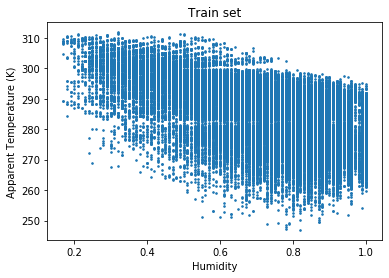

In [53]:
# plotting humidity vs apparent temperature
plt.scatter(train['Humidity'], train['Apparent Temperature (K)'], marker='.',s=10)  
plt.title('Train set')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (K)')
plt.show()
# we can see that there is wide strip/band of data points that shows us linear correlation

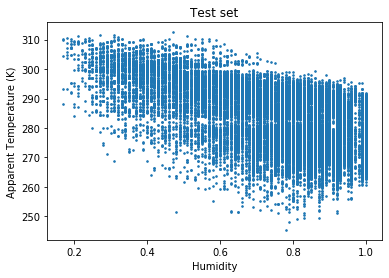

In [54]:
# plotting test set
plt.scatter(test['Humidity'],test['Apparent Temperature (K)'], marker ='.',s=10) 
plt.title('Test set')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (K)')
plt.show()

In [55]:
# coverting required columns Humidity & Apparent Temperatue (C) to numpy array
humidity = np.array(train['Humidity'])
apparent_temp = np.array(train['Apparent Temperature (K)'])

### Building model

In [71]:
total = len(humidity)
theta0 = 0             # choosing random parameters theta0 & theta1
theta1 = 0             # but observed approx values for slope & y-intercept can reduce iterations
alpha = 0.01           # learning rate for gradient descent
iterations = 25000  # total steps to be taken in gradient descent  

predict = lambda humidity : theta0 + theta1*humidity 

# defining derivative of cost functions (avg difference betn value of y from hypothesis & actual y) for parameters theta0 & theta1 
def derivate_cost_func0():
    return (predict(humidity) - apparent_temp).sum()/total
    
def derivate_cost_func1():
    return (predict(humidity) - apparent_temp).dot(humidity)/total

# applying gradient descent algorithm
for _ in range(iterations):
    temp_theta0 = theta0 - alpha*der_cost0()           # correcting parameters by decreasing  
    temp_theta1 = theta1 - alpha*der_cost1()          # cost function goes on decreasing as we tend towards minimum 
    theta0 = temp_theta0                           #  simultaneously updating parameters
    theta1 = temp_theta1

In [72]:
print(f'theta0: {theta0} theta1: {theta1}')
print(f'Hypothesis function: y = {theta0} + {theta1}*x')
print(flag)

theta0: 308.0785447010339 theta1: -32.7062014692131
Hypothesis function: y = 308.0785447010339 + -32.7062014692131*x
0


### Plotting predicted line against train set data points

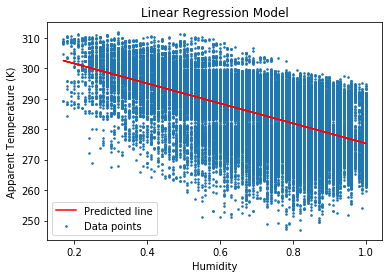

In [73]:
plt.scatter(humidity,apparent_temp, marker ='.',s=10, label='Data points') 
plt.plot(humidity, predict(humidity), c='r', label='Predicted line')
plt.title('Linear Regression Model')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (K)')
plt.legend()
plt.show()

### Calculating mean error

In [74]:
# Finding Root mean squared error (RMSE)
mean_sqr_error = ((predict(train['Humidity'])- train['Apparent Temperature (K)'])**2).sum()        # mean squared error
root_mean_sqr_error = np.sqrt(mean_sqr_error/total)             # root mean squared error
root_mean_sqr_error

8.474644194242712

###  Evaluating model accuracy against test set

In [75]:
# calculating accuracy using absolute error against test set
total_error = abs(predict(test['Humidity']) - test['Apparent Temperature (K)'])/test['Apparent Temperature (K)']
accuracy_percent = (1 - total_error.sum()/len(test))*100        # percentage of accuracy
accuracy_percent

97.51062609425234